### Feature Description

<b> CUSTID :</b> Identification of Credit Card holder (Categorical)<br>
<b>BALANCE :</b> Balance amount left in their account to make purchases<br>
<b>BALANCEFREQUENCY :</b> How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)<br>
<b>PURCHASES :</b> Amount of purchases made from account<br>
<b>ONEOFFPURCHASES :</b> Maximum purchase amount done in one-go<br>
<b>INSTALLMENTSPURCHASES :</b> Amount of purchase done in installment<br>
<b>CASHADVANCE :</b> Cash in advance given by the user<br>
<b>PURCHASESFREQUENCY :</b> How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)<br>
<b>ONEOFFPURCHASESFREQUENCY :</b> How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)<br>
PURCHASESINSTALLMENTSFREQUENCY :</b> How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)<br>
<b>CASHADVANCEFREQUENCY :</b> How frequently the cash in advance being paid<br>
<b>CASHADVANCETRX :</b> Number of Transactions made with "Cash in Advanced"<br>
<b>PURCHASESTRX :</b> Numbe of purchase transactions made<br>
<b>CREDITLIMIT :</b> Limit of Credit Card for user<br>
<b>PAYMENTS :</b> Amount of Payment done by user<br>
<b>MINIMUM_PAYMENTS :</b> Minimum amount of payments made by user<br>
<b>PRCFULLPAYMENT :</b> Percent of full payment paid by user<br>
<b>TENURE :</b> Tenure of credit card service for user<br>


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage,dendrogram

In [4]:
df = pd.read_csv('Customer Data.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
df.shape

(8950, 18)

In [6]:
df.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [7]:
df['TENURE'].value_counts()

12    7584
11     365
10     236
6      204
8      196
7      190
9      175
Name: TENURE, dtype: int64

In [8]:
df['PURCHASES_TRX'].nunique()

173

In [9]:
df['CASH_ADVANCE_TRX'].nunique()

65

In [10]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [11]:
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean(),inplace=True)
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean(),inplace=True)

nv = df.isnull().sum()
nv[nv>0]

Series([], dtype: int64)

In [12]:
df1 = df.iloc[:,1:]
print(df1.columns)
df1.shape

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')


(8950, 17)

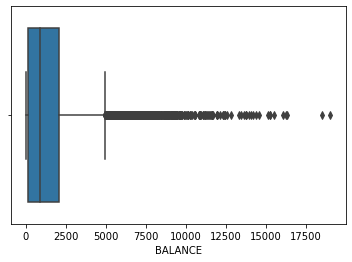

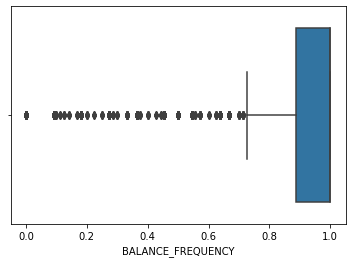

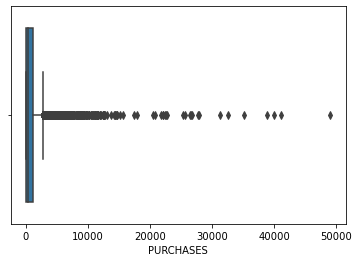

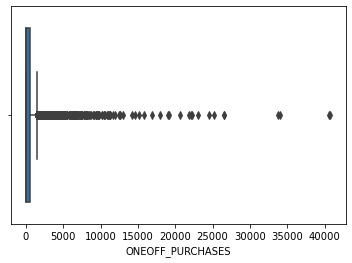

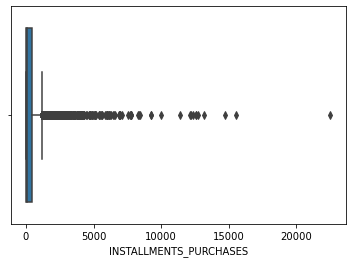

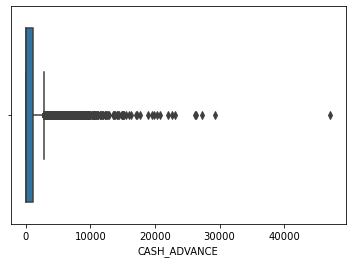

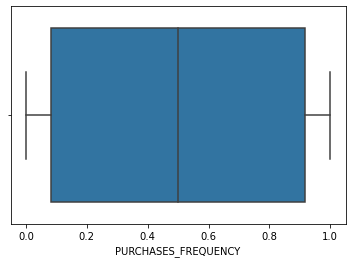

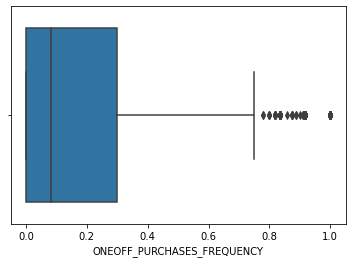

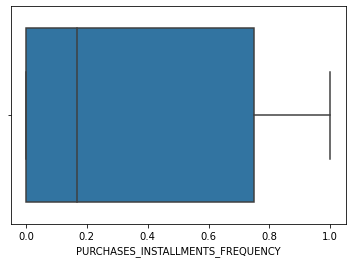

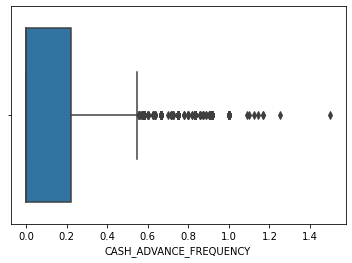

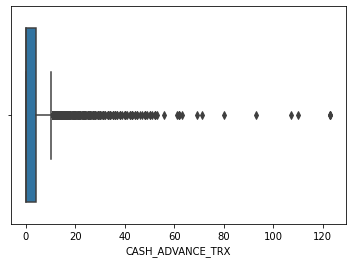

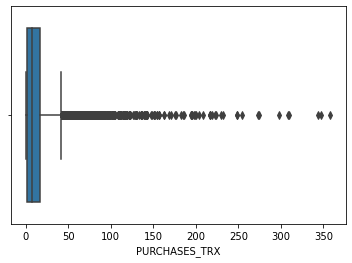

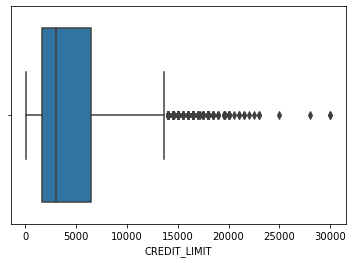

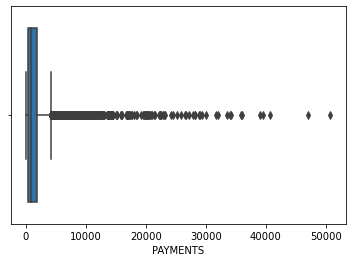

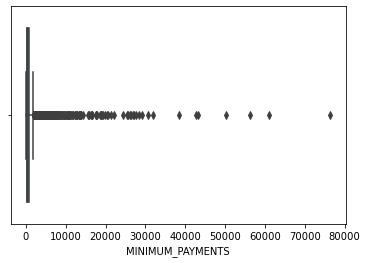

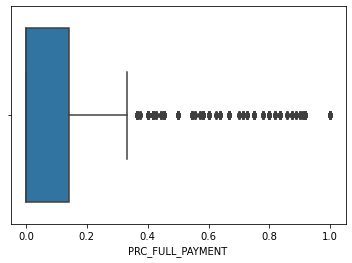

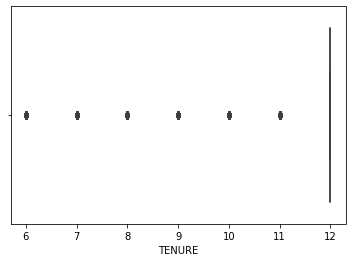

In [13]:
for i in df1.columns:
    sns.boxplot(x=df1[i])
    plt.show()

In [14]:
df1.describe(percentiles=[0.01,0.02,0.03,0.05]).T

,count,mean,std,min,1%,2%,3%,5%,50%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,0.065101,2.140114,4.387232,8.814518,873.385231,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.090909,0.166667,0.181818,0.272727,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,0.000000,0.000000,0.000000,0.000000,361.280000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,0.000000,0.000000,0.000000,38.000000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,0.000000,0.000000,0.000000,89.000000,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.50000


In [15]:
df1.describe(percentiles=[0.95,0.97,0.98,0.99]).T

,count,mean,std,min,50%,95%,97%,98%,99%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,873.385231,5909.111808,7084.980717,7969.618588,9338.804814,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,361.280000,3998.619500,5183.451700,6335.768000,8977.290000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,38.000000,2671.094000,3609.960800,4432.586800,6689.898200,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,89.000000,1750.087500,2273.257000,2757.385000,3886.240500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,4647.169122,6010.909102,7298.609172,9588.163357,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.500000,1.000000,1.000000,1.000000,1.000000,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.083333,1.000000,1.000000,1.000000,1.000000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.166667,1.000000,1.000000,1.000000,1.000000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.583333,0.666667,0.750000,0.833333,1.50000


In [16]:
df1.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [17]:
col_with_lol = ['BALANCE','CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS']

col_with_uol = ['BALANCE','PURCHASES', 'ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
               'CASH_ADVANCE_TRX', 'PURCHASES_TRX','CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS']


In [18]:
def out_treat_low(x):
    x = x.clip(lower = x.quantile(0.05))
    return x

def out_treat_upper(x):
    x = x.clip(upper = x.quantile(0.95))
    return x

In [19]:
df1[col_with_lol] = df1[col_with_lol].apply(out_treat_low)
df1[col_with_uol] = df1[col_with_uol].apply(out_treat_upper)

In [20]:
df1.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,4647.169122,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,89.988924,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


#### StandardScaler

In [21]:
sc = StandardScaler()
df1_sc = sc.fit_transform(df1)
print(df1_sc.shape)
print(type(df1_sc))

(8950, 17)
<class 'numpy.ndarray'>


### Agglomerative Clustering

#### Complete Linkage

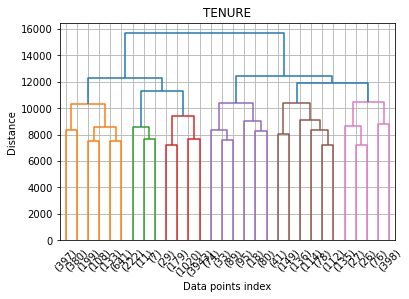

In [22]:
dendrogram(linkage(df1,method='complete',metric='euclidean'),truncate_mode='lastp')
plt.title(i)
plt.xlabel('Data points index')
plt.ylabel('Distance')
plt.grid()
plt.show()

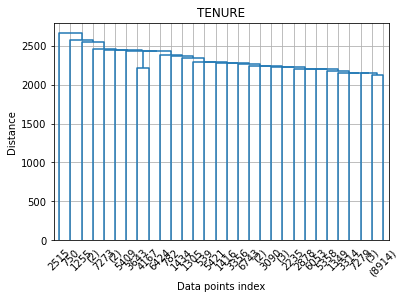

In [23]:
dendrogram(linkage(df1,method='single',metric='euclidean'),truncate_mode='lastp')
plt.title(i)
plt.xlabel('Data points index')
plt.ylabel('Distance')
plt.grid()
plt.show()

#### Ward method

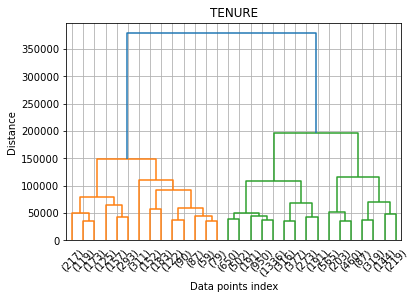

In [24]:
dendrogram(linkage(df1,method='ward',metric='euclidean'),truncate_mode='lastp')
plt.title(i)
plt.xlabel('Data points index')
plt.ylabel('Distance')
plt.grid()
plt.show()

In [25]:
# link_methods = ['single','complete','average','ward']
# for i in link_methods:
#     dendrogram(linkage(df1,method=i,metric='euclidean'),trancate_mode='lastp')
#     plt.title(i)
#     plt.xlabel('Data points index')
#     plt.ylabel('Distance')
#     plt.grid()
#     plt.show()

In [26]:
agg_k3 = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
ypred_agg3 = agg_k3.fit_predict(df1_sc)
print(len(ypred_agg3))

8950


### PCA

In [27]:
pca = PCA(n_components=2)
pcomps = pca.fit_transform(df1_sc)

pca_df1 = pd.DataFrame(pcomps,columns= ['Pca1','Pca2'])
pca_df1.head()

,Pca1,Pca2
0,-1.716946,-1.906566
1,-1.940959,2.702893
2,1.174150,0.010136
3,-0.621748,-0.076249
4,-1.735338,-1.381177


In [28]:
pca_agg = pd.concat([pca_df1,pd.DataFrame({'Agg_Cls3':ypred_agg3})],axis=1)
pca_agg.head()

,Pca1,Pca2,Agg_Cls3
0,-1.716946,-1.906566,1
1,-1.940959,2.702893,1
2,1.174150,0.010136,0
3,-0.621748,-0.076249,1
4,-1.735338,-1.381177,1


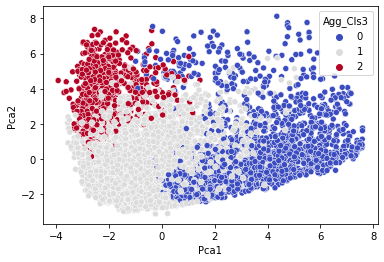

In [29]:
sns.scatterplot(x=pca_agg['Pca1'],y=pca_agg['Pca2'],hue=pca_agg['Agg_Cls3'],palette='coolwarm')
plt.show()

In [30]:
def plot_pca_agg(n):
    m = AgglomerativeClustering(n_clusters=n,linkage='ward')
    ypred = m.fit_predict(df1_sc)
    pca_agg_df = pd.concat([pca_df1,pd.DataFrame({'Agg_Cls':ypred})],axis=1)
#     pca_agg_df.head()
    sns.scatterplot(x=pca_agg_df['Pca1'],y=pca_agg_df['Pca2'],
                    hue=pca_agg_df['Agg_Cls'],palette='coolwarm')
    plt.title(f'PCA with Agglomertaive clustering at n_clusters={n}')
    plt.show()
    return ypred

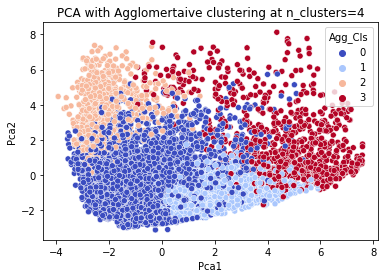

In [31]:
ypred4 = plot_pca_agg(4)

In [76]:
# plt.scatter(pca_agg['Pca1'],pca_agg['Pca2'],c=pca_agg['Agg_Cls3'])
# # plt.legend()
# plt.show()

In [46]:
df['Agg_Cls3'] = ypred_agg3
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Agg_Cls3,Agg_cls4
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1,0
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1,0
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0,1
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1,0
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1,0


In [47]:
df['Agg_cls4'] = ypred4
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Agg_Cls3,Agg_cls4
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1,0
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1,0
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0,1
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1,0
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1,0


#### Profiling

In [48]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE', 'Agg_Cls3',
       'Agg_cls4'],
      dtype='object')

#### Cluster -3 Profiling

In [49]:
# Cluster 3
profiling3 = df.iloc[:,:-1].groupby('Agg_Cls3').mean()
profiling3

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
Agg_Cls3,,,,,,,,,,,,,,,,,
0,1465.634726,0.974551,2435.117866,1492.702437,942.729157,497.142227,0.916958,0.437177,0.720613,0.055761,1.577612,35.033582,5585.133989,2544.439357,654.498891,0.277236,11.914552
1,1150.512544,0.812113,426.812884,219.310490,207.833782,706.555216,0.338304,0.106864,0.238793,0.114181,2.253726,6.643443,3567.457804,1200.373200,837.232641,0.113680,11.346311
2,4321.726502,0.976001,178.975410,138.152140,40.897494,4030.783688,0.127688,0.073961,0.053916,0.495763,14.136364,2.329268,6770.565410,2493.277895,1647.812313,0.024966,11.354767


In [51]:
profiling3.shape

(3, 17)

In [68]:
avg3 = df.iloc[:,1:-2].mean().reset_index().T
avg3

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
index,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.44945,1733.143852,864.206542,0.153715,11.517318


In [69]:
avg3.columns = avg3.iloc[0]
avg3

index,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
index,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.44945,1733.143852,864.206542,0.153715,11.517318


In [70]:
avg3.drop('index',inplace=True) # axis=0 (Rows)
avg3

index,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.44945,1733.143852,864.206542,0.153715,11.517318


In [71]:
avg3.index = ['Avg']
avg3

index,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
Avg,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.44945,1733.143852,864.206542,0.153715,11.517318


In [73]:
prof3 = avg3.append(profiling3)
prof3

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
Avg,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.44945,1733.143852,864.206542,0.153715,11.517318
0,1465.634726,0.974551,2435.117866,1492.702437,942.729157,497.142227,0.916958,0.437177,0.720613,0.055761,1.577612,35.033582,5585.133989,2544.439357,654.498891,0.277236,11.914552
1,1150.512544,0.812113,426.812884,219.31049,207.833782,706.555216,0.338304,0.106864,0.238793,0.114181,2.253726,6.643443,3567.457804,1200.3732,837.232641,0.11368,11.346311
2,4321.726502,0.976001,178.97541,138.15214,40.897494,4030.783688,0.127688,0.073961,0.053916,0.495763,14.136364,2.329268,6770.56541,2493.277895,1647.812313,0.024966,11.354767


In [74]:
prof3.to_csv('Profiling_cls3.csv')

#### KMeans

In [75]:
from sklearn.cluster import KMeans

In [80]:
print(type(df1_sc))

<class 'numpy.ndarray'>


WCSS
 [152149.99999999997, 120085.86546175057, 98478.38921630789, 86949.4798480387, 80314.85217196976, 75077.2209465939, 70122.49721488723, 68034.00893511409, 64195.716029367126, 61739.26468875014, 59526.55844915825, 57464.54538492469, 55582.89788006651, 54224.24345031456, 53025.17449135404, 52054.965681211856, 50457.646628272414, 49540.1368692975]


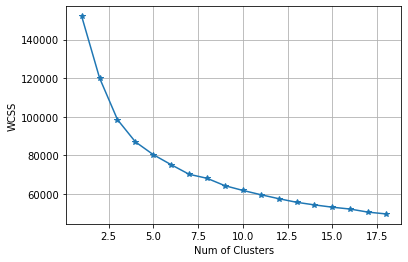

In [79]:
wcss = []
for i in range(1,19):  # i=1,2,3...,18 = num of clusters
    m = KMeans(n_clusters=i)
    m.fit(df1_sc)
    wcss.append(m.inertia_)
    
print('WCSS\n',wcss)
plt.plot(list(range(1,19)),wcss,marker='*')
plt.xlabel('Num of Clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

#### Applying KMeans at K=5

In [82]:
k5 = KMeans(n_clusters=5)
k5.fit(df1_sc)
ypred5 = k5.predict(df1_sc)
print(len(ypred5))

8950


In [83]:
pca_df1.head()

,Pca1,Pca2
0,-1.716946,-1.906566
1,-1.940959,2.702893
2,1.174150,0.010136
3,-0.621748,-0.076249
4,-1.735338,-1.381177


In [84]:
pca_kmeans = pd.concat([pca_df1,pd.DataFrame({'KMeans_Cls5':ypred5})],axis=1)
pca_kmeans.head()

,Pca1,Pca2,KMeans_Cls5
0,-1.716946,-1.906566,1
1,-1.940959,2.702893,2
2,1.174150,0.010136,0
3,-0.621748,-0.076249,1
4,-1.735338,-1.381177,1


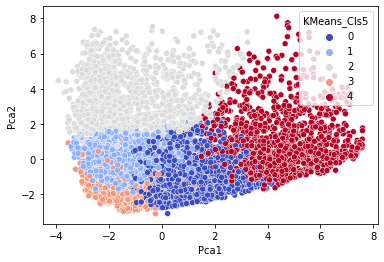

In [85]:
sns.scatterplot(x=pca_kmeans['Pca1'],y=pca_kmeans['Pca2'],
                hue=pca_kmeans['KMeans_Cls5'],palette='coolwarm')
plt.show()

In [86]:
def plot_pca_kmeans(n):
    m = KMeans(n_clusters=n)
    ypred = m.fit_predict(df1_sc)
    pca_kmeans_df = pd.concat([pca_df1,pd.DataFrame({'KMeans_Cls':ypred})],axis=1)
    
    sns.scatterplot(x=pca_kmeans_df['Pca1'],y=pca_kmeans_df['Pca2'],
                    hue=pca_kmeans_df['KMeans_Cls'],palette='coolwarm')
    plt.title(f'PCA with KMeans clustering at n_clusters={n}')
    plt.show()
    return ypred

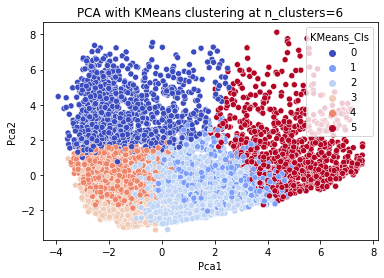

In [87]:
ypred6 = plot_pca_kmeans(6)